#Implementasi Tugas Akhir


In [2]:
import time
import matplotlib.pyplot as plt

####Membuat Data Dummy

In [3]:
items = [
    ("Baju", 7, 12),
    ("Celana", 5, 8),
    ("Jaket", 10, 18),
    ("Topi", 2, 3),
    ("Sepatu", 8, 15),
    ("Kaos Kaki", 1, 2),
    ("Buku", 3, 5),
    ("Laptop", 9, 20),
    ("Kamera", 6, 10),
    ("Powerbank", 3, 6),
    ("Tablet", 4, 8),
    ("Smartphone", 3, 9),
    ("Charger", 1, 3),
    ("Headphones", 2, 5),
    ("Mouse", 1, 4),
    ("Keyboard", 5, 7),
    ("Monitor", 8, 15),
    ("Printer", 7, 14),
    ("Router", 2, 6),
    ("Modem", 1, 4),
    ("External HDD", 5, 12),
    ("Flash Drive", 1, 2),
    ("SSD", 2, 10)
]
capacity = 31  # Kapasitas koper

###**Implementasi Menggunakan Brute Force**
Mencari solusi optimal Knapsack Problem dengan Brute Force.

  Args:
    items: Daftar item, masing-masing berupa tuple (nama, berat, nilai).
    capacity: Kapasitas koper.

  Returns:
    Tuple yang berisi nilai total, total berat, dan daftar item yang dipilih.

In [4]:
import time

def brute_force_knapsack(items, capacity):

    start_time = time.time()
    n = len(items)
    max_value = 0
    total_weight = 0
    selected_items = []

    for i in range(2**n):
        current_weight = 0
        current_value = 0
        subset = []

        for j in range(n):
            if (i >> j) & 1:
                current_weight += items[j][1]
                current_value += items[j][2]
                subset.append(items[j])

        if current_weight <= capacity and current_value > max_value:
            max_value = current_value
            total_weight = current_weight
            selected_items = subset[:]

    end_time = time.time()
    execution_time = end_time - start_time
    return max_value, selected_items, total_weight, execution_time

max_value, selected_items, total_weight, execution_time = brute_force_knapsack(items, capacity)

print(f"Nilai Maksimum: {max_value}")
print(f"Subset Terpilih: {selected_items}")
print(f"Total Berat: {total_weight}")
print(f"Waktu Eksekusi: {execution_time:.6f} detik")

Nilai Maksimum: 83
Subset Terpilih: [('Kaos Kaki', 1, 2), ('Laptop', 9, 20), ('Tablet', 4, 8), ('Smartphone', 3, 9), ('Charger', 1, 3), ('Headphones', 2, 5), ('Mouse', 1, 4), ('Router', 2, 6), ('Modem', 1, 4), ('External HDD', 5, 12), ('SSD', 2, 10)]
Total Berat: 31
Waktu Eksekusi: 46.073953 detik


###Implementasi Menggunakan Dynamic Programming
Mencari solusi optimal Knapsack Problem dengan Dynamic Programming.

  Args:
    items: Daftar item, masing-masing berupa tuple (nama, berat, nilai).
    capacity: Kapasitas koper.

  Returns:
    Tuple yang berisi nilai total dan daftar item yang dipilih.

In [5]:
import time

def dynamic_programming_knapsack(items, capacity):
    start_time = time.time()
    n = len(items)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, capacity + 1):
            if items[i - 1][1] <= j:
                dp[i][j] = max(
                    items[i - 1][2] + dp[i - 1][j - items[i - 1][1]], dp[i - 1][j]
                )
            else:
                dp[i][j] = dp[i - 1][j]

    selected_items = []
    i = n
    j = capacity
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_items.append(items[i - 1])
            j -= items[i - 1][1]
        i -= 1

    end_time = time.time()
    execution_time = end_time - start_time

    # Print tabel dp
    print("Tabel DP:")
    for row in dp:
        print(row)

    return dp[n][capacity], selected_items, execution_time

max_value, selected_items, execution_time = dynamic_programming_knapsack(items, capacity)

print(f"\nNilai Maksimum: {max_value}")
print(f"Subset Terpilih: {selected_items}")
print(f"Waktu Eksekusi: {execution_time:.6f} detik")

Tabel DP:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[0, 0, 0, 0, 0, 8, 8, 12, 12, 12, 12, 12, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[0, 0, 0, 0, 0, 8, 8, 12, 12, 12, 18, 18, 20, 20, 20, 26, 26, 30, 30, 30, 30, 30, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
[0, 0, 3, 3, 3, 8, 8, 12, 12, 15, 18, 18, 21, 21, 23, 26, 26, 30, 30, 33, 33, 33, 38, 38, 41, 41, 41, 41, 41, 41, 41, 41]
[0, 0, 3, 3, 3, 8, 8, 12, 15, 15, 18, 18, 21, 23, 23, 27, 27, 30, 33, 33, 36, 36, 38, 41, 41, 45, 45, 48, 48, 48, 53, 53]
[0, 2, 3, 5, 5, 8, 10, 12, 15, 17, 18, 20, 21, 23, 25, 27, 29, 30, 33, 35, 36, 38, 38, 41, 43, 45, 47, 48, 50, 50, 53, 55]
[0, 2, 3, 5, 7, 8, 10, 12, 15, 17, 18, 20, 22, 23, 25, 27, 29, 30, 33, 35, 36, 38, 40, 41, 43, 45, 47, 48, 50, 52, 53, 55]
[0, 2, 3, 5, 7, 8, 10, 12, 15, 20, 22

Tabel DP:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12]
[0, 0, 0, 0, 0, 8, 8, 12, 12, 12, 12]
[0, 0, 0, 0, 0, 8, 8, 12, 12, 12, 18]
[0, 0, 3, 3, 3, 8, 8, 12, 12, 15, 18]
[0, 0, 3, 3, 3, 8, 8, 12, 15, 15, 18]
[0, 2, 3, 5, 5, 8, 10, 12, 15, 17, 18]
[0, 2, 3, 5, 7, 8, 10, 12, 15, 17, 18]
[0, 2, 3, 5, 7, 8, 10, 12, 15, 20, 22]
[0, 2, 3, 5, 7, 8, 10, 12, 15, 20, 22]
[0, 2, 3, 6, 8, 9, 11, 13, 15, 20, 22]
[0, 2, 3, 6, 8, 10, 11, 14, 16, 20, 22]
[0, 2, 3, 9, 11, 12, 15, 17, 19, 20, 23]
[0, 3, 5, 9, 12, 14, 15, 18, 20, 22, 23]
[0, 3, 5, 9, 12, 14, 17, 19, 20, 23, 25]
[0, 4, 7, 9, 13, 16, 18, 21, 23, 24, 27]
[0, 4, 7, 9, 13, 16, 18, 21, 23, 24, 27]
[0, 4, 7, 9, 13, 16, 18, 21, 23, 24, 27]
[0, 4, 7, 9, 13, 16, 18, 21, 23, 24, 27]
[0, 4, 7, 10, 13, 16, 19, 22, 24, 27, 29]
[0, 4, 8, 11, 14, 17, 20, 23, 26, 28, 31]
[0, 4, 8, 11, 14, 17, 20, 23, 26, 28, 31]
[0, 4, 8, 11, 14, 17, 20, 23, 26, 28, 31]
[0, 4, 10, 14, 18, 21, 24, 27, 30, 33, 36]
Tabel DP:
[0, 0, 0, 0, 0, 0, 0, 0

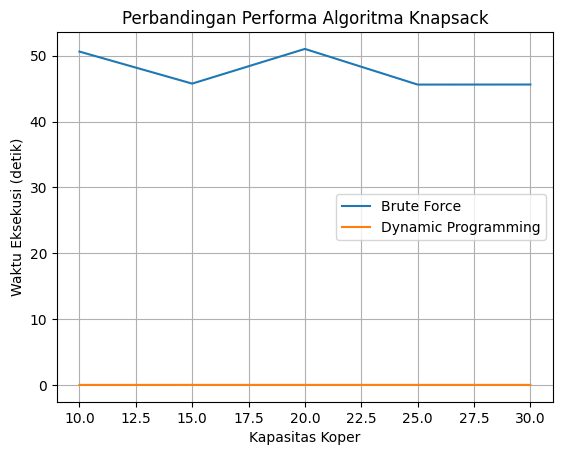

In [6]:
def evalPerforma(items, capacities):
    brute_force_times = []
    dynamic_programming_times = []

    for capacity in capacities:
        start_time = time.time()
        brute_force_knapsack(items, capacity)
        brute_force_times.append(time.time() - start_time)

        start_time = time.time()
        dynamic_programming_knapsack(items, capacity)
        dynamic_programming_times.append(time.time() - start_time)

    return brute_force_times, dynamic_programming_times


# Ni array buat nge test kapasitas maksimum yang beda beda
capacities = [10, 15, 20, 25, 30]

brute_force_times, dynamic_programming_times = evalPerfoma(items, capacities)
# Visualisasi perbandingan performa
plt.plot(capacities, brute_force_times, label="Brute Force")
plt.plot(capacities, dynamic_programming_times, label="Dynamic Programming")
plt.xlabel("Kapasitas Koper")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Performa Algoritma Knapsack")
plt.legend()
plt.grid(True)
plt.show()

##Kalo Jumlah Item nya yang diubah dengan generate nilai random untuk item nya



Data Dummy (5 items):
[('Item 1', 15, 14), ('Item 2', 8, 3), ('Item 3', 12, 9), ('Item 4', 18, 10), ('Item 5', 16, 8)]

Tabel DP:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 14, 14, 14, 14, 14, 14, 14, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 9, 9, 9, 14, 14, 14, 14, 14, 14, 14, 14, 17, 17, 17, 17, 23, 23, 23, 23, 23, 23, 23, 23, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 9, 9, 9, 14, 14, 14, 14, 14, 14, 14, 14, 17, 17, 17, 17, 23, 23, 23, 23, 23, 23, 24, 24, 26, 26, 26, 26, 26, 

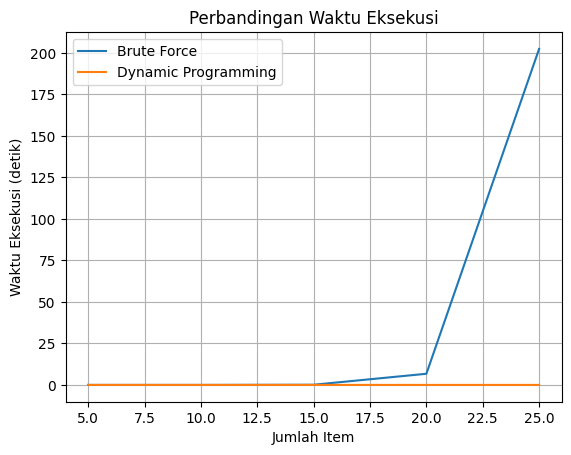

In [11]:
def evalPerformaJmlhItem(n_items_list, capacity, items_generator):
    brute_force_times = []
    dynamic_programming_times = []

    for n_items in n_items_list:
        items = items_generator(n_items)

        _, _, _, brute_force_time = brute_force_knapsack(items, capacity)
        brute_force_times.append(brute_force_time)

        _, _, dp_time = dynamic_programming_knapsack(items, capacity)
        dynamic_programming_times.append(dp_time)

    return brute_force_times, dynamic_programming_times

def generate_random_items(n):
    items = [(f"Item {i+1}", random.randint(1, 20), random.randint(1, 50)) for i in range(n)]
    print(f"Data Dummy ({n} items):\n{items}\n")  # Print data dummy
    return items

# Contoh penggunaan fungsi evaluate_performance
n_items_list = [5, 10, 15, 20, 25]
capacity = 50

brute_force_times, dynamic_programming_times = evalPerformaJmlhItem(
    n_items_list, capacity, generate_random_items
)

# Menampilkan waktu eksekusi
for i, n in enumerate(n_items_list):
    print(f"Jumlah Item: {n}")
    print(f"  Brute Force: {brute_force_times[i]:.6f} detik")
    print(f"  Dynamic Programming: {dynamic_programming_times[i]:.6f} detik")

# Plot hasil perbandingan
plt.plot(n_items_list, brute_force_times, label="Brute Force")
plt.plot(n_items_list, dynamic_programming_times, label="Dynamic Programming")
plt.xlabel("Jumlah Item")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Waktu Eksekusi")
plt.legend()
plt.grid(True)
plt.show()